## Read Data from dataset

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
# Loading the CSV with pandas
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking percentage of churning customers to non-churners 

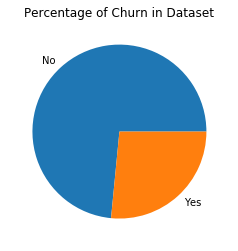

1869 customers out of 7043 churned while 5174 did not churn


In [32]:
plt.pie(df['Churn'].value_counts(sort = True),labels=df['Churn'].unique(),)
plt.title('Percentage of Churn in Dataset')
plt.show()
print('{} customers out of {} churned while {} did not churn'.format(df[df['Churn']=='Yes'].shape[0],df.shape[0],df[df['Churn']=='No'].shape[0]))

## Data Preprocessing

In [33]:
#Drop irrelevant columns
df.drop(['customerID'], axis=1, inplace=True)
#Drop null values
df.dropna(inplace=True)
#Convert numbers which are actually strings to numeric type
df['TotalCharges'].replace(" ","0",inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

## Perform One Hot ENcoding of all Categorical COlumns
### ML models work better with just numbers

In [68]:
#Store column names which are categorical in a list
object_columns = []
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        object_columns.append(i)
        
#One Hot Encoding seems unnecessary for columns which have Yes/No so we wont one hot encode them
for i in df.columns:
    if df[i][0] == 'Yes' or df[i][0] == 'No':
        object_columns.remove(i)
        categorical_columns.append(i)
#Generate a new dataframe with one hot encoded columns
numeric_df = pd.get_dummies(df, columns=object_columns)
#Convert YEs/No columns to 0/1
for i in categorical_columns:
    numeric_df[i] = numeric_df[i].map({'Yes': 1, 'No': 0})
numeric_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1.0,0.0,1.0,0.0,0.0,0.0,0,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1.0,1.0,0.0,0.0,0.0,0.0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1.0,0.0,1.0,1.0,0.0,0.0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
5,0,0,0,8,1,0.0,0.0,1.0,0.0,1.0,1.0,1,99.65,820.50,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
6,0,0,1,22,1,0.0,1.0,0.0,0.0,1.0,0.0,1,89.10,1949.40,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
7,0,0,0,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0,29.75,301.90,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
8,0,1,0,28,1,0.0,0.0,1.0,1.0,1.0,1.0,1,104.80,3046.05,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
9,0,0,1,62,1,1.0,1.0,0.0,0.0,0.0,0.0,0,56.15,3487.95,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0


## Create Train and Test Datasets

In [84]:
from sklearn.model_selection import train_test_split
#Y is the "answer" or dependent variable
#X is the set of columns used to arrive at the "answer" i.e. the whole dataset minus the y column
Y = numeric_df["Churn"].values
X = numeric_df.drop(labels = ["Churn"],axis = 1)

#Use sklearn to split the dataset into 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Perform Logistic Regression and Test the model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
acc = metrics.accuracy_score(y_test, prediction_test)
print('The Accuracy of the Logistic Regression model is {}% on the test_set'.format(100*round(acc,3)))


The Accuracy of the Logistic Regression model is 79.3% on the test_set


In [94]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.590818
InternetService_Fiber optic                0.345847
PaperlessBilling                           0.309371
PaymentMethod_Electronic check             0.241034
StreamingTV                                0.204981
SeniorCitizen                              0.199336
StreamingMovies                            0.193764
MultipleLines_No phone service             0.193175
MultipleLines_Yes                          0.003243
TotalCharges                               0.000278
InternetService_No                         0.000000
MonthlyCharges                            -0.000554
                                             ...   
PaymentMethod_Credit card (automatic)     -0.072876
PaymentMethod_Bank transfer (automatic)   -0.077594
Contract_One year                         -0.079579
Dependents                                -0.104458
PaymentMethod_Mailed check                -0.145725
OnlineBackup                              -0.175411
PhoneService

## Now using RandomForest Model to make the prediction

In [105]:
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier(max_depth=7, random_state=0)
random_f.fit(X_train, y_train)
prediction = random_f.predict(X_test)
rf = metrics.accuracy_score(y_test, prediction)
print('The Accuracy of the Random Forest model is {}% on the test_set'.format(100*round(rf,3)))

The Accuracy of the Random Forest model is 78.5% on the test_set
